<a href="https://colab.research.google.com/github/andrepps22/Data_Science/blob/main/Analisando_os_Dados_da_Cidade_de_Barcelona_no_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Barcelona*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/spain/catalonia/barcelona/2023-12-13/visualisations/listings.csv')
df.info()

## Análise dos Dados


**Dicionário das variáveis**

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - números de reviews (avaliações) nos últimos 12 meses
* `license` - licença para aluguél de curta duração

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print(f'Qunatidade de linhas:{df.shape[0]} Quantidade de colunas:{df.shape[1]}')
# verificar as 5 primeiras entradas do dataset
print(f'''As 5 primeiras entradas:
{df.dtypes.head(5)}''')

Qunatidade de linhas:18321 Quantidade de colunas:18
As 5 primeiras entradas:
id                      int64
name                   object
host_id                 int64
host_name              object
neighbourhood_group    object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print('Quantidade exata de valores ausentes por cada item:')
print(df.isnull().sum().sort_values(ascending=False))

print('''Porcentagem de valores ausentes por itens:''')
print((df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False))

Quantidade exata de valores ausentes por cada item:
license                           5917
last_review                       4369
reviews_per_month                 4369
price                             2265
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
name                                 0
minimum_nights                       0
number_of_reviews                    0
host_id                              0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
id                                   0
dtype: int64
Porcentagem de valores ausentes por itens:
license                           32.296272
last_review                       23.846952
reviews_per_month                 23.846952
price                             12.362862
host_name     

Os valores ausentes são analisados e estudados cuidadosamente para determinar a melhor forma de tratá-los. Avalia-se se é vantajoso remover esses valores da base de dados ou aplicar algum tipo de tratamento. Esse processo leva em consideração a totalidade da base, uma vez que a presença de dados ausentes pode conter informações sobre a natureza dos dados em si.

### **Q3. Qual o tipo de distribuição das variáveis?**

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(15,15));


### **Q4. Qual a média dos preços de aluguel?**

In [8]:
# ver a média da coluna `price`
print(f"Media dos valores das loções: {df['price'].mean():.2f}")

Media dos valores das loções: 126.49


#### **Q4. Qual a correlação existente entre as variáveis**

In [9]:
# criar uma matriz de correlação
cor = df.corr()
# mostrar a matriz de correlação
cor

<ipython-input-9-9ce96fad0b49>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.438646,-0.039020,-0.017790,-0.046287,0.045139,-0.315143,0.201608,0.185176,0.140420,-0.144839
host_id,0.438646,1.000000,-0.035652,-0.012186,-0.016543,0.013036,-0.228463,0.144684,0.052622,0.057760,-0.064542
latitude,-0.039020,-0.035652,1.000000,0.265301,0.012946,-0.009441,-0.005920,-0.037800,-0.035330,0.014396,-0.019482
longitude,-0.017790,-0.012186,0.265301,1.000000,0.001444,-0.009503,0.002989,0.009271,-0.066869,-0.015587,0.011876
price,-0.046287,-0.016543,0.012946,0.001444,1.000000,0.236224,-0.000343,-0.020564,-0.013709,-0.023491,-0.002228
minimum_nights,0.045139,0.013036,-0.009441,-0.009503,0.236224,1.000000,-0.131502,-0.178969,0.055133,0.061490,-0.167245
number_of_reviews,-0.315143,-0.228463,-0.005920,0.002989,-0.000343,-0.131502,1.000000,0.566815,-0.127156,-0.024359,0.742367
reviews_per_month,0.201608,0.144684,-0.037800,0.009271,-0.020564,-0.178969,0.566815,1.000000,-0.061082,-0.031774,0.808622
calculated_host_listings_count,0.185176,0.052622,-0.035330,-0.066869,-0.013709,0.055133,-0.127156,-0.061082,1.000000,0.200955,-0.087682
availability_365,0.140420,0.057760,0.014396,-0.015587,-0.023491,0.061490,-0.024359,-0.031774,0.200955,1.000000,-0.011055



Ao analisarmos a matriz, observamos que as correlações apresentam baixa intensidade. Destaca-se a maior correlação entre as variaveis: 'number_of_reviews' e 'reviews_per_month'.

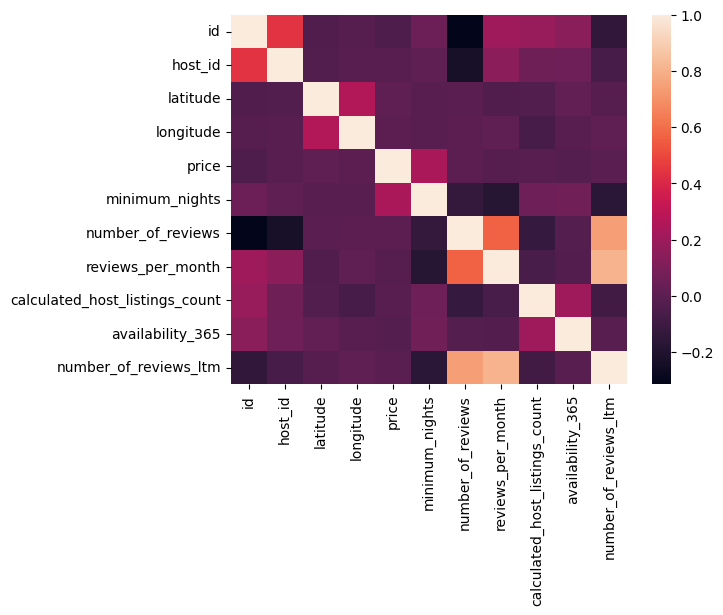

In [10]:
# plotar um heatmap a partir das correlações
sns.heatmap(cor);

Com a matriz de correlação plotada, é possível visualizar de forma gráfica a correlação existente entre cada dimensão. Isso proporciona uma compreensão mais clara das relações entre as variáveis e auxilia na identificação de padrões ou tendências nos dados


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [11]:
# mostrar a quantidade de cada tipo de imóvel disponível
df['room_type'].value_counts().sort_values(ascending=False)

Entire home/apt    10751
Private room        7275
Shared room          161
Hotel room           134
Name: room_type, dtype: int64

In [12]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df['room_type'].value_counts() / df.shape[0] * 100).sort_values(ascending=False)

Entire home/apt    58.681295
Private room       39.708531
Shared room         0.878773
Hotel room          0.731401
Name: room_type, dtype: float64

A análise revela que 58% das locações correspondem a apartamentos ou casas completas. Em análises subsequentes, pretende-se examinar a correlação entre a variável `'PRICE'` e a variável `'ROOM_TYPE'`.


### **Q6. Qual a localidade mais cara do dataset?**



In [26]:
# ver preços por bairros, na média
bairros = df.groupby('neighbourhood_group')['price'].mean()
bairros.sort_values(ascending=False)

neighbourhood_group
Horta-Guinardó         220.009501
Les Corts              153.188088
Eixample               143.562023
Sant Martí             133.775054
Sarrià-Sant Gervasi    122.726161
Sants-Montjuïc         116.490485
Gràcia                 113.205710
Ciutat Vella           100.805570
Nou Barris              68.462500
Sant Andreu             67.420814
Name: price, dtype: float64

In [ ]:
# Analise e compreensão do bairro mais caro
df[df['neighbourhood_group'] == 'Horta-Guinardó'].sort_values('price', ascending=False)

In [54]:
select = (df['neighbourhood_group'] == 'Horta-Guinardó') & (df['price'].notnull())
print(f'Quantidade de imoveis: {df.loc[select].shape[0]}')
print(f'Valor total de todos os imoveis: {df.loc[select]["price"].sum()}') # 421

Quantidade de imoveis: 421
Valor total de todos os imoveis: 92624.0


Observação: Embora haja um total de 525 anúncios, apenas 421 foram considerados no cálculo do valor, uma vez que apenas estes têm o campo 'price' preenchido.

Ao analisar o bairro Horta-Guinardó, percebemos que a presença de um único quarto de hotel, especificamente o anúncio (25927238), eleva a média de preço dos 421 imóveis para o valor de 220 euros por dia. Além disso, nota-se que esse quarto também apresenta uma quantidade de noites mínimas elevada, o que pode ser um indicativo de erro no preenchimento dos formulários do anúncio.

<Axes: title={'center': 'Localização Geográfica dos Imóveis'}, xlabel='longitude', ylabel='latitude'>

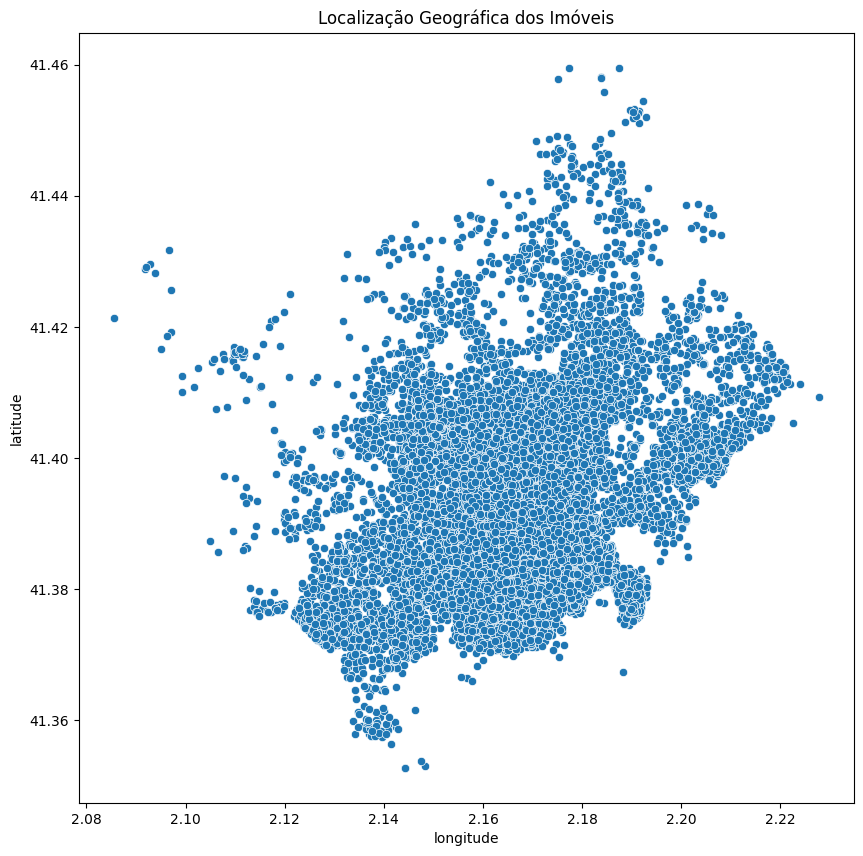

In [64]:
# plotar os imóveis pela latitude-longitude

plt.figure(figsize=(10, 10))
plt.title('Localização Geográfica dos Imóveis')
sns.scatterplot(df, x=df.longitude, y=df.latitude)

No gráfico acima, podemos visualizar um esboço da cidade de Barcelona, destacando, simultaneamente, a densidade de aluguéis.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [78]:
# ver a média da coluna `minimum_nights``
print(f"Médias de noites para locação: {df['minimum_nights'].mean():.2f}")


Médias de noites para locação: 14.87


<Axes: >

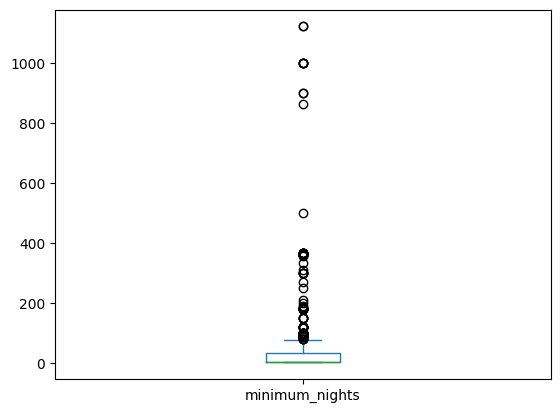

In [75]:
df['minimum_nights'].plot(kind='box')

## Conclusões



Esta é uma análise preliminar destinada a compreender os dados apresentados. O conjunto de dados requer uma análise mais aprofundada para possibilitar uma compreensão mais detalhada e, consequentemente, obter insights com maior precisão.

Observa-se a presença de muitos dados ausentes no dataset, o que demanda um entendimento mais claro da estrutura e do funcionamento do sistema de formulários utilizados para armazenar os anúncios. É crucial que a exclusão ou modificação dos registros com dados ausentes seja realizada de forma criteriosa, a fim de não comprometer a clareza na compreensão dos dados.